In [244]:
import os
import numpy as np
import pandas as pd 
import cv2
import skimage
import skimage.io
from skimage.feature import hog
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from shutil import copyfile
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage import exposure
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
def list_images(directory):
    try:
        return [f for f in os.listdir(directory) if f.endswith(".jpg")]
    except FileNotFoundError:
        return []

In [84]:
def load_data(data_path):
    images = []
    labels = []

    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            
            # Load image in grayscale
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Resize the image to (64, 64)
            image = cv2.resize(image, (64, 64))  # Adjust the size as needed
            
            # Flatten the image
            flattened_image = image.flatten()
            
            # Append the flattened image to the images list
            images.append(flattened_image)
            
            # Append the corresponding label to the labels list
            labels.append(label)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels


In [85]:
ROOT_PATH = 'C:/Users/Fatma/path/to/save'


In [86]:
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing") 

In [87]:
images, labels = load_data(train_data_directory)

In [88]:
len(images)

3453

In [89]:
flat_images = np.random.rand(7770, 64, 64, 3)

In [90]:
flattened_images = flat_images.reshape(flat_images.shape[0], -1)

In [91]:
# Create a DataFrame
df = pd.DataFrame(flattened_images)

In [92]:
# your actual target data
target = np.random.randint(0, 2, size=(7770,))

In [93]:
df['Target'] = target

In [94]:
x_train = df.iloc[:,:-1] #input data 

y_train = df.iloc[:,-1] #output data

In [95]:
#load the test images
images, labels = load_data(test_data_directory)

In [96]:
flat_test_images = np.array(images)

In [97]:
test_target = np.array(labels)

In [98]:
#dataframe
df = pd.DataFrame(flat_test_images) 

df['Target'] = test_target

x_test = df.iloc[:,:-1] #input data 

y_test = df.iloc[:,-1] #output data

# TO Know the Accuracy

In [109]:
X_train, y_train = load_data(train_data_directory)
X_test, y_test = load_data(test_data_directory)


In [110]:
your_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [111]:
your_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [112]:
y_pred = your_model.predict(X_test)


In [113]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.51%


In [122]:
# initializing the model and train it
model = LogisticRegression(solver='liblinear')


In [123]:
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [124]:
y_predict = model.predict(X_test)


In [125]:
y_predict

array(['dandelion', 'daisy', 'dandelion', 'daisy', 'daisy', 'dandelion',
       'daisy', 'dandelion', 'rose', 'tulip', 'rose', 'sunflower',
       'dandelion', 'dandelion', 'tulip', 'sunflower', 'daisy',
       'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion',
       'dandelion', 'rose', 'tulip', 'dandelion', 'daisy', 'dandelion',
       'rose', 'daisy', 'rose', 'daisy', 'rose', 'rose', 'daisy',
       'dandelion', 'rose', 'rose', 'rose', 'daisy', 'dandelion', 'rose',
       'daisy', 'dandelion', 'sunflower', 'dandelion', 'tulip',
       'dandelion', 'daisy', 'dandelion', 'daisy', 'sunflower',
       'dandelion', 'rose', 'rose', 'dandelion', 'dandelion', 'dandelion',
       'daisy', 'dandelion', 'tulip', 'daisy', 'dandelion', 'dandelion',
       'dandelion', 'rose', 'dandelion', 'rose', 'sunflower', 'dandelion',
       'daisy', 'dandelion', 'tulip', 'rose', 'dandelion', 'rose',
       'daisy', 'daisy', 'rose', 'dandelion', 'dandelion', 'daisy',
       'dandelion', 'dande

In [128]:
accuracy = accuracy_score(y_predict, y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 25.81%


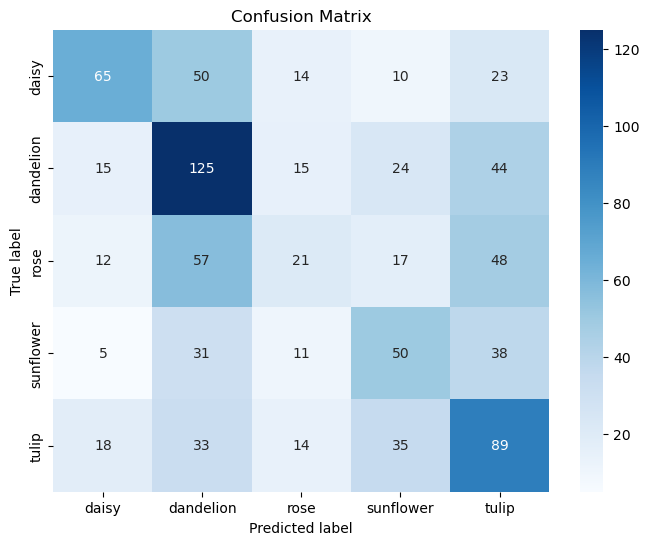

In [243]:

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(true_labels)),
            yticklabels=sorted(set(true_labels)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [263]:
import os
import skimage.io

def load_data(data_directory, num_directories=5):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for i, d in enumerate(directories):
        if i >= num_directories:
            break
        
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".jpg")]
        
        for f in file_names:
            img = skimage.io.imread(f)
            images.append(img)
            labels.append(d)  # Use the actual directory name as the label
            
    return images, labels


In [264]:
train_data_directory = "C:/Users/Fatma/path/to/save/Training"  # Replace with the actual path
train_images, train_labels = load_data(train_data_directory, num_directories=5)

# Load test data (assuming it's a separate directory)
test_data_directory = "C:/Users/Fatma/path/to/save/Testing"  # Replace with the actual path
test_images, test_labels = load_data(test_data_directory, num_directories=5)

In [265]:
def preprocess_images_for_hog(images, size=(64, 64)):
    processed_images = []

    for img in images:
        # Resize image
        resized_img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)

        # Convert to grayscale if it has three channels
        if resized_img.shape[-1] == 3:
            resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

        # Check if the image is not empty
        if np.any(resized_img):
            # Compute HOG features
            features, hog_image = hog(resized_img, orientations=8, pixels_per_cell=(8, 8),
                                      cells_per_block=(1, 1), visualize=True)

            # Enhance contrast in HOG image
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

            processed_images.append(hog_image_rescaled)
        else:
            print("Warning: Empty image encountered.")

    return np.array(processed_images)




In [266]:
# Preprocess train and test images
train_images_processed = preprocess_images_for_hog(train_images)
test_images_processed = preprocess_images_for_hog(test_images)

In [267]:
train_hog_features = []

for idx, img in enumerate(train_images_processed):
    # Extract HOG features
    features, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

    # Print information about the image and HOG features
    print(f"Image {idx + 1}: Shape={img.shape}, Min pixel value={np.min(img)}, Max pixel value={np.max(img)}")
    print(f"HOG features: Shape={features.shape}, Min value={np.min(features)}, Max value={np.max(features)}")

    # Append HOG features to the list
    train_hog_features.append(features)


Image 1: Shape=(64, 64), Min pixel value=0.0, Max pixel value=1.0
HOG features: Shape=(512,), Min value=0.0, Max value=0.5074881359984142
Image 2: Shape=(64, 64), Min pixel value=0.0, Max pixel value=1.0
HOG features: Shape=(512,), Min value=0.0, Max value=0.5196707595064737
Image 3: Shape=(64, 64), Min pixel value=0.0, Max pixel value=1.0
HOG features: Shape=(512,), Min value=0.0, Max value=0.6756638913341033
Image 4: Shape=(64, 64), Min pixel value=0.0, Max pixel value=1.0
HOG features: Shape=(512,), Min value=0.0, Max value=0.5405893471523326
Image 5: Shape=(64, 64), Min pixel value=0.0, Max pixel value=1.0
HOG features: Shape=(512,), Min value=0.0, Max value=0.5379393067213306
Image 6: Shape=(64, 64), Min pixel value=0.0, Max pixel value=1.0
HOG features: Shape=(512,), Min value=0.0, Max value=0.6399302430118984
Image 7: Shape=(64, 64), Min pixel value=0.0, Max pixel value=1.0
HOG features: Shape=(512,), Min value=0.0, Max value=0.6180508891669958
Image 8: Shape=(64, 64), Min pixel

In [268]:
# Convert the list to a NumPy array
train_hog_features = np.array(train_hog_features)


In [269]:
# Check if the array is not empty
if train_hog_features.size == 0:
    print("Error: No HOG features extracted. Check the input images or the HOG extraction process.")
else:
    # Train logistic regression model
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(train_hog_features, train_labels)

In [270]:
# Compute HOG features for test images
test_hog_features = []
for img in test_images_processed:
    hog_img = hog(img, visualize=False)
    test_hog_features.append(hog_img)

In [271]:
train_images_flat = train_images_processed.reshape(len(train_images_processed), -1)
test_images_flat = test_images_processed.reshape(len(test_images_processed), -1)

In [272]:
# Standardize features using StandardScaler
scaler = StandardScaler()
train_hog_features = scaler.fit_transform(train_images_flat)
test_hog_features = scaler.transform(test_images_flat)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_hog_features, train_labels)

# Predict on test set
predictions = logreg.predict(test_hog_features)

In [273]:
true_labels = test_labels

In [274]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 32.75%


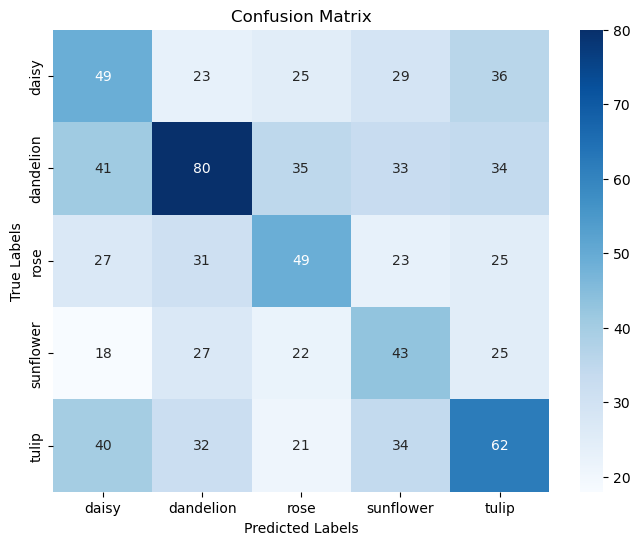

In [312]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(true_labels)),
            yticklabels=sorted(set(true_labels)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


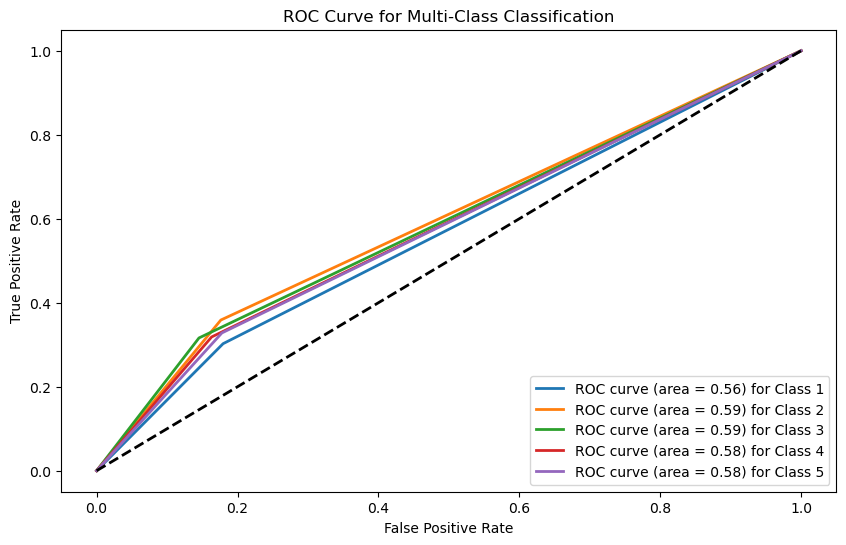

In [324]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming true_labels and predictions are defined
# Convert true labels to one-hot encoding
one_hot_true_labels = label_binarize(true_labels, classes=np.unique(true_labels))

# Convert predictions to one-hot encoding
predictions_one_hot = label_binarize(predictions, classes=np.unique(true_labels))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

num_classes = one_hot_true_labels.shape[1]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(one_hot_true_labels[:, i], predictions_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for Class {i + 1}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


In [313]:
#It is a dimensionality reduction technique that is commonly used in machine learning and data analysis
#هو الحصول على أهم المعلومات في البيانات مع التخلص من المعلومات الأقل أهمية 
pca = PCA(n_components=2)
train_hog_features_pca = pca.fit_transform(train_hog_features)

In [314]:
k = 5

In [315]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [316]:
kmeans.fit(train_hog_features_pca)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [317]:
cluster_labels = kmeans.predict(train_hog_features_pca)


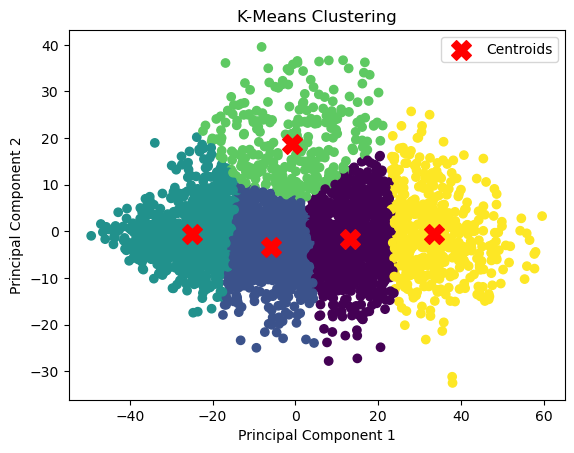

In [318]:
plt.scatter(train_hog_features_pca[:, 0], train_hog_features_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

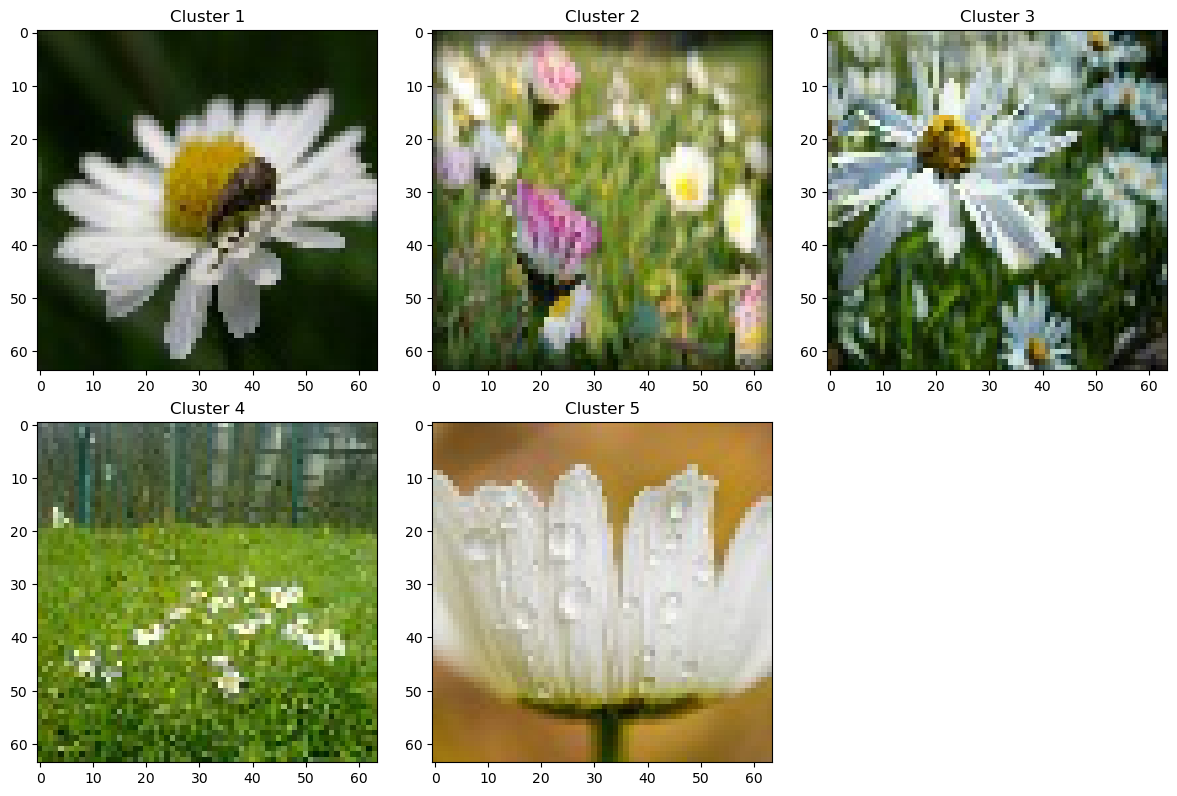

In [319]:
# Predict the cluster labels
cluster_labels = kmeans.predict(train_hog_features_pca)

# Find the index of the first image in each cluster
representative_indices = [np.min(np.where(cluster_labels == i)) for i in range(k)]

# Visualize the representative images
plt.figure(figsize=(12, 8))

for i, idx in enumerate(representative_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_images[idx], cmap='gray')  # Assuming train_images contain the original images
    plt.title(f'Cluster {i + 1}')

plt.tight_layout()
plt.show()
